# Probability of evolutionary rescue

Theoretical calculations.

In [1]:
run rescue_theory.py

## A. Effect of *s*

In [4]:
s = np.arange(.011, .1001, .001)
p1 = []
q1 = []
for i in range(len(s)):
    exact, approx = prob_rescue(10000, 0, .01, s[i], 1e-5, 100, verbose=False)
    p1.append(exact)
    q1.append(approx)

## B. Effect of *r*

In [9]:
r = np.arange(.01, .0901, .001)
p2 = []
q2 = []
for i in range(len(r)):
    exact, approx = prob_rescue(10000, 0, r[i], .1, 1e-5, 100, verbose=False)
    p2.append(exact)
    q2.append(approx)

## C / D. Effect of *u*

In [10]:
logu = np.arange(-4, -6.01, -.02)
p3 = []
q3 = []
for i in range(len(logu)):
    exact, approx = prob_rescue(10000, 0, 0.01, .02, 10**logu[i], 100, verbose=False)
    p3.append(exact)
    q3.append(approx)

In [11]:
logu2 = np.arange(-3, -5.01, -.02)
p4 = []
q4 = []
for i in range(len(logu2)):
    exact, approx = prob_rescue(10000, 0, 0.09, .1, 10**logu2[i], 100, verbose=False)
    p4.append(exact)
    q4.append(approx)

## Draw Figure

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()
sns.set_style('ticks')
sns.set_context('poster')

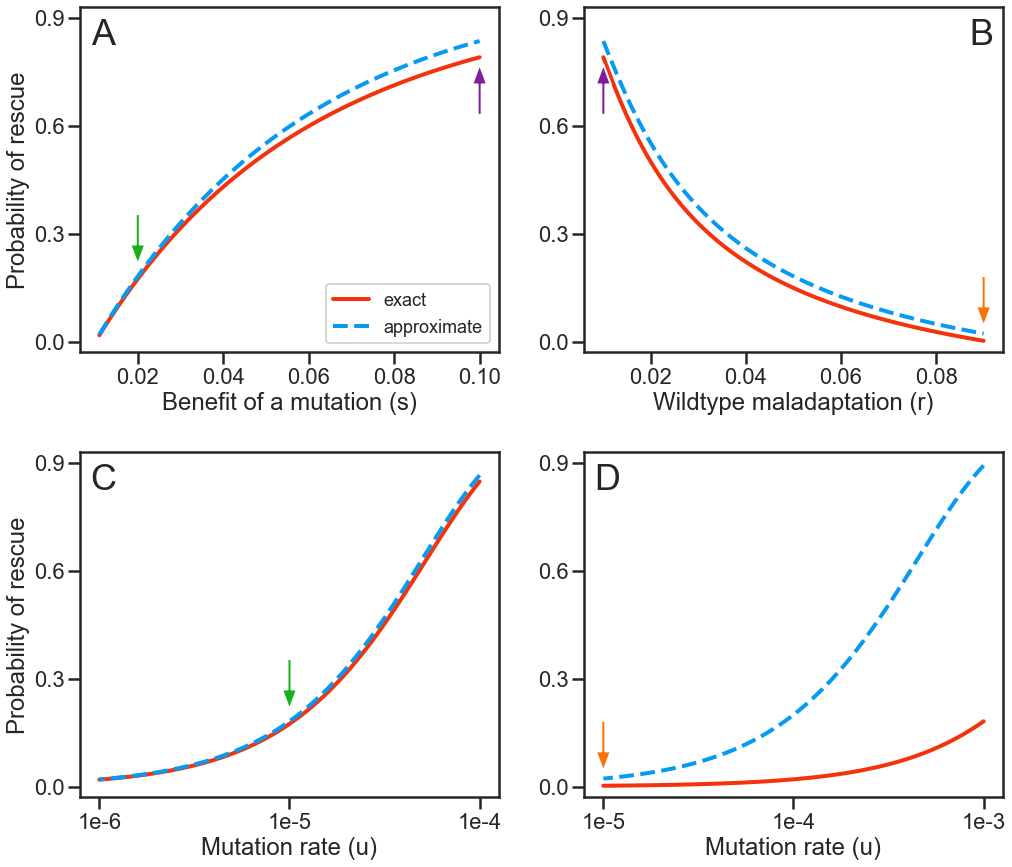

In [14]:
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axs = [ax1, ax2, ax3, ax4]
pp = [p1, p2, p3, p4]
qq = [q1, q2, q3, q4]
xx = [s, r, logu, logu2]
labs = ['A', 'B', 'C', 'D']
xlabs = ['Benefit of a mutation (s)', 'Wildtype maladaptation (r)', 'Mutation rate (u)', 'Mutation rate (u)']
xcoord = [.009, .087, -6.05, -5.05]
ax1.set_position([.08, .59 , .415, .40])
ax2.set_position([.58, .59 , .415, .40])
ax3.set_position([.08, .075, .415, .40])
ax4.set_position([.58, .075, .415, .40])
for i in range(4):
    axs[i].set_xlabel(xlabs[i])
    axs[i].set_ylim(-.03, .93)
    axs[i].set_yticks([0, .3, .6, .9])
    axs[i].plot(xx[i], pp[i], color=sns.xkcd_rgb['vermillion'], label='exact', lw=4)
    axs[i].plot(xx[i], qq[i], '--', color=sns.xkcd_rgb['azure'], label='approximate', lw=4)
    axs[i].text(xcoord[i], .897, labs[i], size=36, ha='left', va='top')
    if i in [0, 2]:
        axs[i].set_ylabel('Probability of rescue')
ax3.set_xticks([-6, -5, -4])
ax3.set_xticklabels(['1e-6', '1e-5', '1e-4'])
ax4.set_xticks([-5, -4, -3])
ax4.set_xticklabels(['1e-5', '1e-4', '1e-3'])
ax1.annotate('', xy=(.1, p1[-1]-.02), xytext=(.1, p1[-1]-.16), 
    arrowprops=dict(facecolor=sns.xkcd_rgb['purple'], headwidth=15, headlength=20))
ax2.annotate('', xy=(.01, p2[0]-.02), xytext=(.01, p2[0]-.16), 
    arrowprops=dict(facecolor=sns.xkcd_rgb['purple'], headwidth=15, headlength=20))
ax1.annotate('', xy=(.02, p1[9]+.04), xytext=(.02, p1[9]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['green'], headwidth=15, headlength=20))
ax3.annotate('', xy=(-5, p3[50]+.04), xytext=(-5, p3[50]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['green'], headwidth=15, headlength=20))
ax2.annotate('', xy=(.09, p2[-1]+.04), xytext=(.09, p2[-1]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['orange'], headwidth=15, headlength=20))
ax4.annotate('', xy=(-5, p4[-1]+.04), xytext=(-5, p4[-1]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['orange'], headwidth=15, headlength=20))
ax1.legend(loc=4, fontsize=18)
fig.savefig('probrescue.pdf')